# Mise à l'épreuve du modèle de regression linéaire 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from linear_regression import LinearRegression
from utils import mean_squared_error

## Regression linéaire simple

### Génération des données d'entrainement

In [2]:
# Générer des données
np.random.seed(42)  # Pour la reproductibilité des résultats

X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2  # Relation affine y = 2X + 5 + bruit

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 1)
y shape: (100,)


### Visualisation

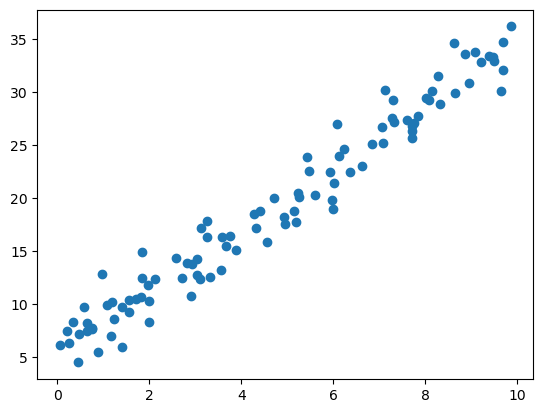

In [3]:
plt.scatter(X, y)
plt.show()

### Entrainement du modèle

In [4]:
model1 = LinearRegression(n_iter=1000)

In [5]:
model1.fit(X, y)

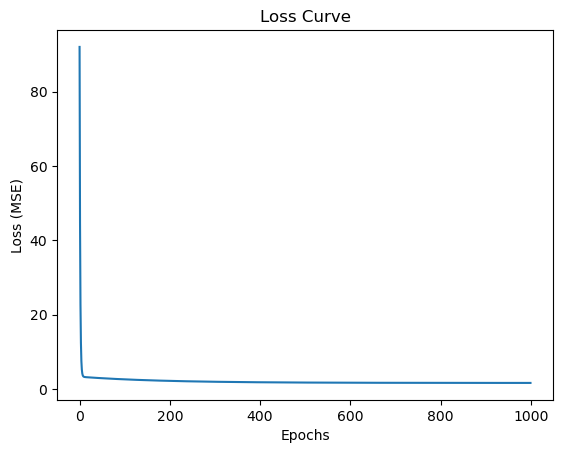

In [6]:
# Evolution du coût au cours de l'entraînement
model1.plot()

In [7]:
print("Poids du modèle:", model1.coef_)
print("Biais:", model1.intercept_)

Poids du modèle: [[2.94103409]]
Biais: [5.21555927]


### Confrontation entre valeurs réelles et valeurs prédites

In [8]:
y_pred = model1.predict(X)
print("MSE: ", mean_squared_error(y, y_pred.squeeze()))

MSE:  3.2394163997201018


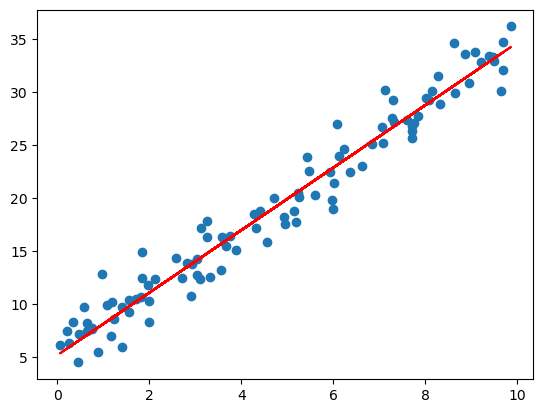

In [9]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='red')
plt.show()

### Enregistrer le modèle

In [10]:
model1.to_json("lin_reg_model1.json")

## Régression linéaire multiple: 2 features

### Génération des données

In [11]:
from sklearn.datasets import make_regression

In [12]:
X, y = make_regression(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_targets=1,
    bias=10
)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 2)
y shape: (150,)


### Visualisation

In [13]:
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib
# matplotlib.use("WebAgg")

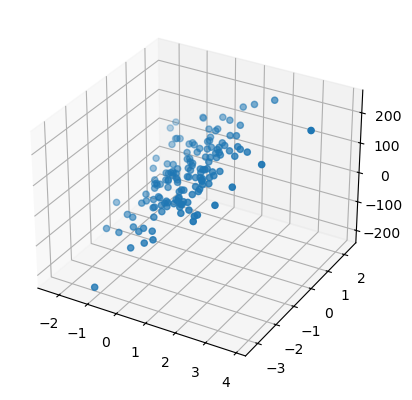

In [14]:
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

### Modélisation

In [15]:
model2 = LinearRegression()

In [16]:
model2.fit(X, y)

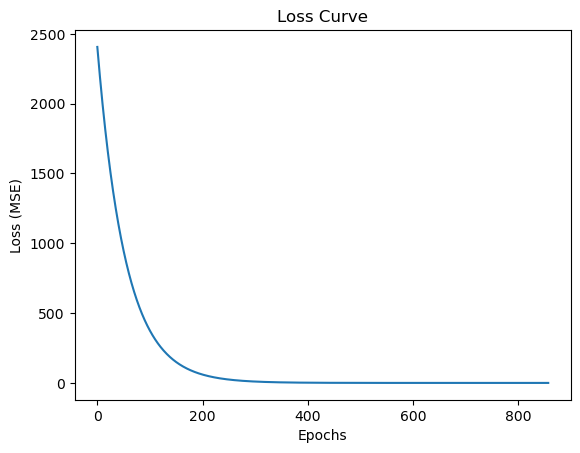

In [17]:
model2.plot()
plt.show()

In [18]:
print("Poids du modèle:", model2.coef_)
print("Biais:", model2.intercept_)

Poids du modèle: [[53.18269438]
 [51.15301063]]
Biais: [10.00534333]


### Confrontation entre valeurs réelles et valeurs prédites

In [19]:
y_pred = model2.predict(X)
print("MSE: ", mean_squared_error(y, y_pred.squeeze()))

MSE:  0.0009411014891668952


In [20]:
import matplotlib
matplotlib.use("WebAgg")

ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], y)

x1, x2 = np.meshgrid(X[:,0], X[:,1])
f = model2.coef_[0] * x1 + model2.coef_[0] * x2 + model2.intercept_

ax.plot_surface(x1, x2, f, cmap='plasma', alpha=0.5)

plt.show()